# Example tests

In [1]:
#add the dev version of aare
import sys
sys.path.append('/home/l_msdetect/erik/aare/build')
from aare import CtbRawFile, RawMasterFile, File, RawFile, RawSubFile, DetectorType
from aare.transform import moench05

#Our normal python imports
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt

#Rendering version
from IPython.display import Markdown, display
try:
    from importlib import metadata
    v = metadata.version('aare')
except:
    v = 'dev'
    
s = f'Example run on: **{dt.now():%Y-%m-%d %H:%M}** with aare: **{v}**'
display(Markdown(s))

base = Path('/mnt/sls_det_storage/matterhorn_data/aare_test_data/')

Example run on: **2024-11-12 13:08** with aare: **dev**

## Pedestal from recorded data

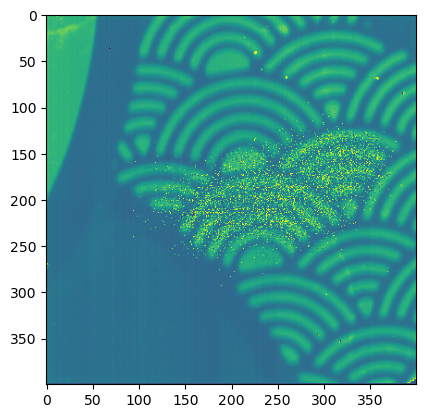

In [2]:
# Mean of the first 1000 frames
f = File(base/'Moench03new/cu_half_speed_master_4.json')
pd = f.read_n(1000).mean(axis = 0)

fig, ax = plt.subplots()
im = ax.imshow(pd)

In [3]:
# Check that what we loaded from a raw file matched what we expect
expected = np.load(base /'Moench03new/cu_half_speed_pd.npy')
assert (pd == expected).all()

## Matterhorn 02 data 

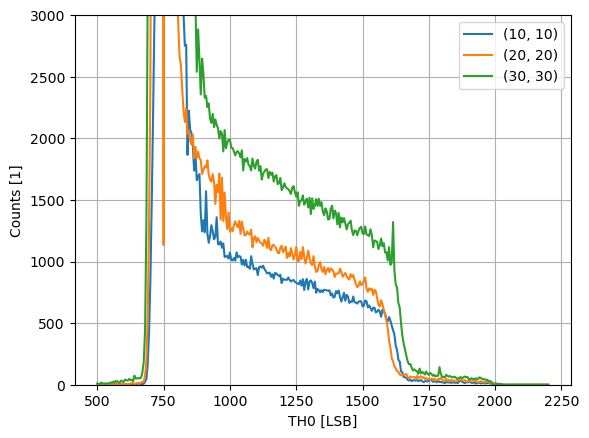

In [4]:
from aare.transform import matterhorn02
with CtbRawFile(base / 'MH02/scan_12keV_vrf700_vrsh700_th0_master_0.json', transform = matterhorn02) as f:
    header, data = f.read() #Read all frames from the file.
    th = np.arange(*f.scan_parameters)
    
#plot a few pixels
pixels = [(10,10),(20,20), (30,30)]

fig, ax = plt.subplots()
for p in pixels:
    ax.plot(th, data[:,*p], label = f'{p}')

ax.set_ylim(0,3e3)
ax.grid()
ax.set_xlabel(f'TH0 [LSB]')
ax.set_ylabel('Counts [1]')
ax.legend()    

In [5]:
# np.savez(base/'MH02/scan_12keV__vrf700_vrsh700_th0', th = th, data = data)
with np.load(base/'MH02/scan_12keV__vrf700_vrsh700_th0.npz') as f:
    expected_th = f['th']
    expected_data = f['data']
    
assert (th == expected_th).all()
assert (data == expected_data).all()